# Lab 1 Complex Network Analysis

In [1]:
from data import prepare_data
from synthetic_data import SyntheticGraphGenerator

%config InlineBackend.figure_format = 'svg'

## Prepare real datasets and generate synthetic data

In [2]:
# Load `facebook graph` and `collaboration network`
real_graphs = prepare_data()

# Create synthetic networks
synthetic_graphs = {
    'random': SyntheticGraphGenerator.create_random_edge_graph(num_nodes=5000, edge_prob=0.001),
    'grid': SyntheticGraphGenerator.create_grid_graph(n=65, m=75),
    'kleinberg': SyntheticGraphGenerator.create_kleinberg_graph(n=65, m=75),
    'tree': SyntheticGraphGenerator.create_tree_graph(num_nodes=5000),
    'split': SyntheticGraphGenerator.create_split_graph(clique_size=100, stable_set_size=4950, prob=0.01)
}

## Basic Algorithms
- The Depth-First Search and Breadth-First Search traversals
- Computation of the connected components
- Computation of the degree sequence
- Computation of the diameter
- Computation of the girth (minimum size of a cycle)

For demonstration, we will use the following smaller graph:

![Demo Graph](demo_graph1.png "Demo Graph")

In [3]:
from graph import Graph
import pprint


pp = pprint.PrettyPrinter(indent=4)

graph = Graph()
graph.nodes = set(range(7))
graph.adjacency_list = {
    0: [1],
    1: [0, 2, 3],
    2: [1, 4],
    3: [1, 5, 6],
    4: [2, 5],
    5: [3, 4, 6],
    6: [3, 5]
}

pp.pprint(graph.adjacency_list)

{   0: [1],
    1: [0, 2, 3],
    2: [1, 4],
    3: [1, 5, 6],
    4: [2, 5],
    5: [3, 4, 6],
    6: [3, 5]}


In [4]:
import basic_algorithms


_, out = basic_algorithms.depth_first_search(graph, next(iter(graph.nodes)))
print('DFS:', out, '\n')

_, out = basic_algorithms.breadth_first_search(graph, next(iter(graph.nodes)))
print('BFS:', out, '\n')

cc = basic_algorithms.get_connected_components(graph)
print('Connected components:')
pp.pprint(cc)
print()

degree_sequence = basic_algorithms.compute_degree_sequence(graph)
print('Degree sequence:')
pp.pprint(degree_sequence)
print()

diameter, src, dest = basic_algorithms.compute_diameter(graph)
print(f'Diameter: {diameter} between nodes {src} and {dest}.\n')

girth = basic_algorithms.compute_girth(graph)
print(f'Girth random graph: {girth}.')

DFS: [0, 1, 2, 4, 5, 3, 6] 

BFS: [[0, 0], [1, 1], [2, 2], [3, 2], [4, 3], [5, 3], [6, 3]] 

Connected components:
[{0, 1, 2, 3, 4, 5, 6}]

Degree sequence:
{0: 1, 1: 3, 2: 2, 3: 3, 4: 2, 5: 3, 6: 2}

Diameter: 3 between nodes 4 and 0.

Girth random graph: 3.


## Preliminary analysis

### Connected components dize distribution
Compute the distribution size of the connected components for all real datasets and for the synthetic models. Compare the results graphically (i.e., make a plot). A graph has a big component if it has a connected components with at least n/100 vertices, and no other components larger than, say log(n)/2. Classify the graphs studied (real and synthetic) depending on whether they have a big component.

3000
11000


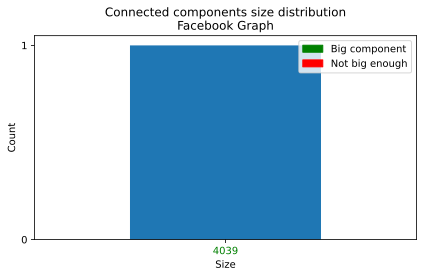

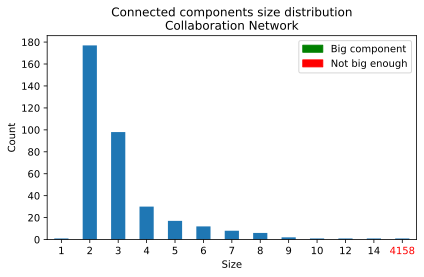

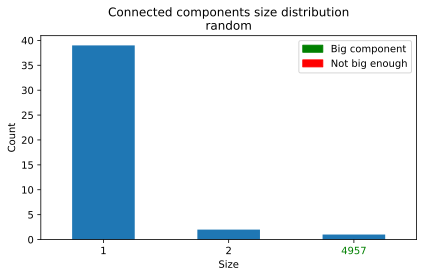

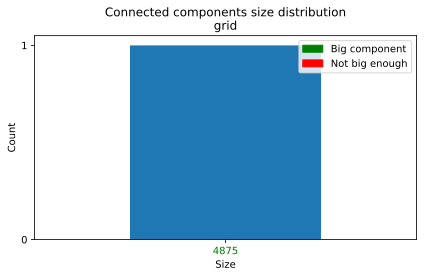

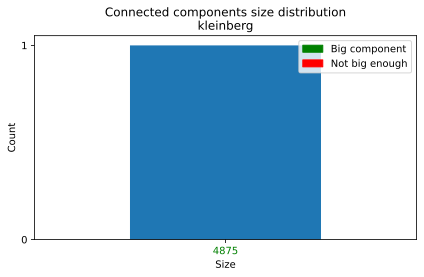

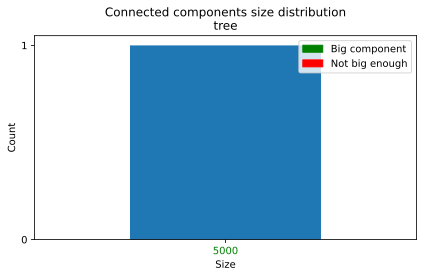

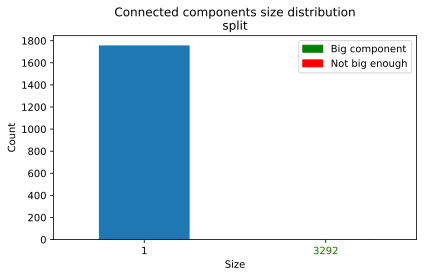

In [5]:
from analysis import distribution_of_connected_components


distribution_of_connected_components(graph=real_graphs['fb_graph'], name='Facebook Graph')
distribution_of_connected_components(graph=real_graphs['collaboration_network'], name='Collaboration Network')

for name, graph in synthetic_graphs.items():
    distribution_of_connected_components(graph=graph, name=name)

### Power-law exponenet estimation for degree distribution
A graph is scale-free if, for some constant c, the number of vertices of degree i grows proportionally to 1/i^c. You can check that graphicallyusing a log-scale.Classify the graphs studied depending whether they are scale-free or not (for those scale-free, also give an estimate of the constant c).

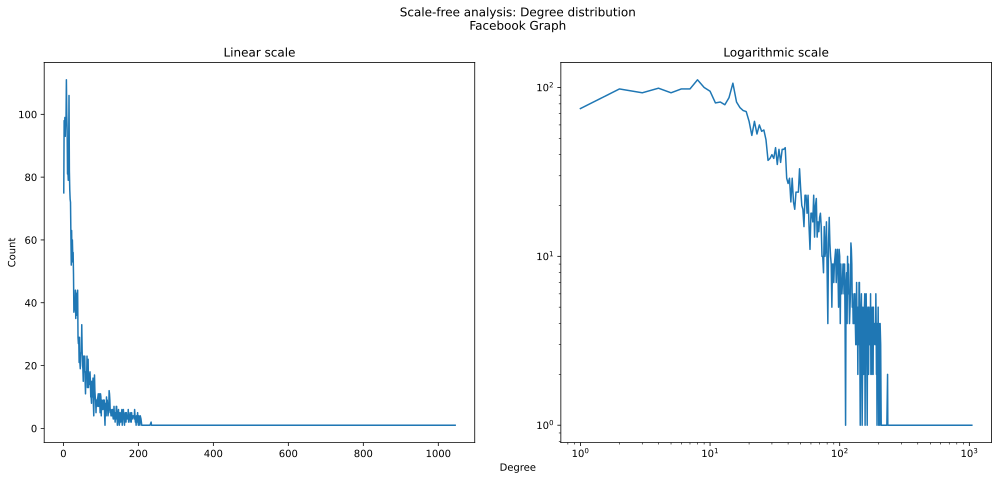

Facebook Graph: scale free ((False, 1.2587730752094903))


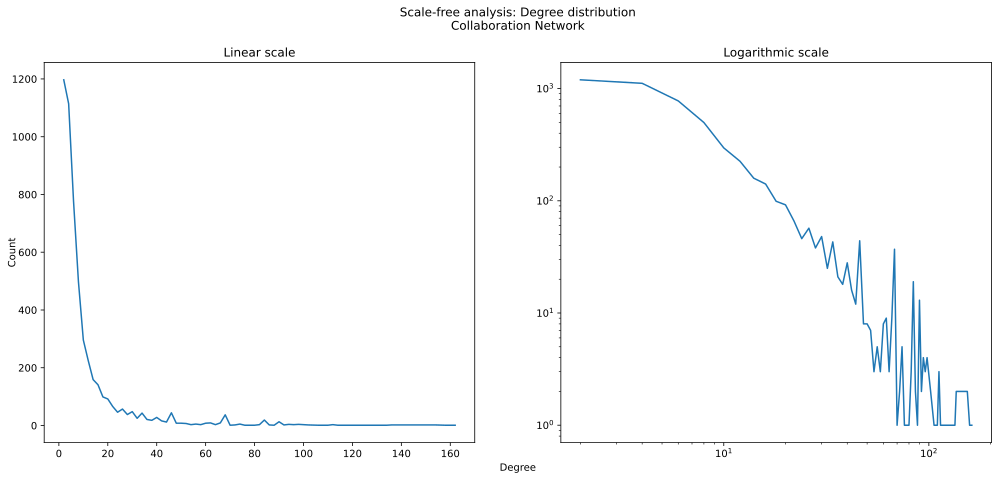

Collaboration Network: scale free ((False, 1.3907192999221227))


Values less than or equal to 0 in data. Throwing out 0 or negative values


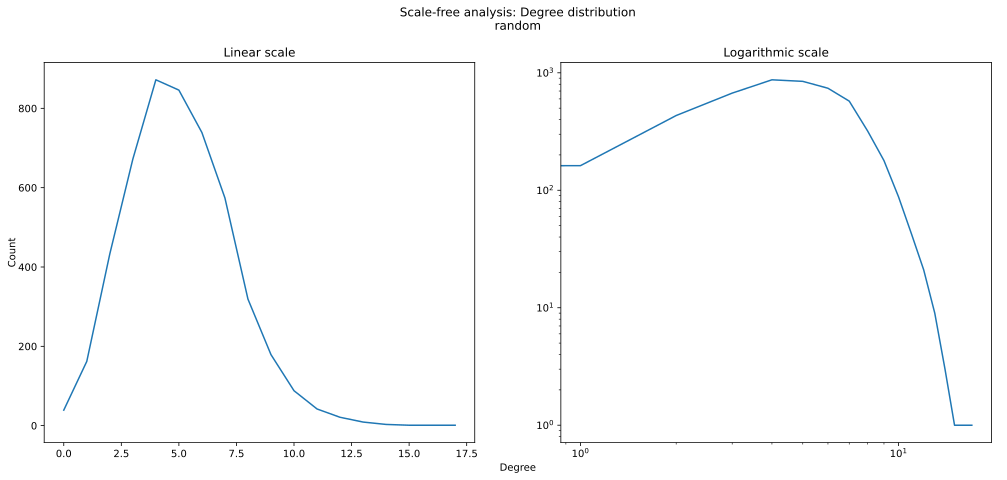

random: scale free ((False, 1.4535850496382996))


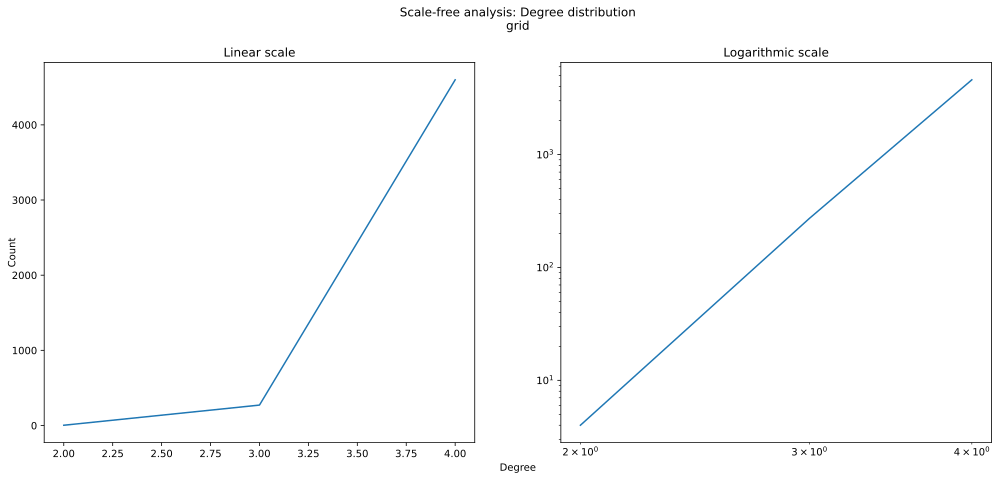

grid: scale free ((False, 1.4847728905552264))


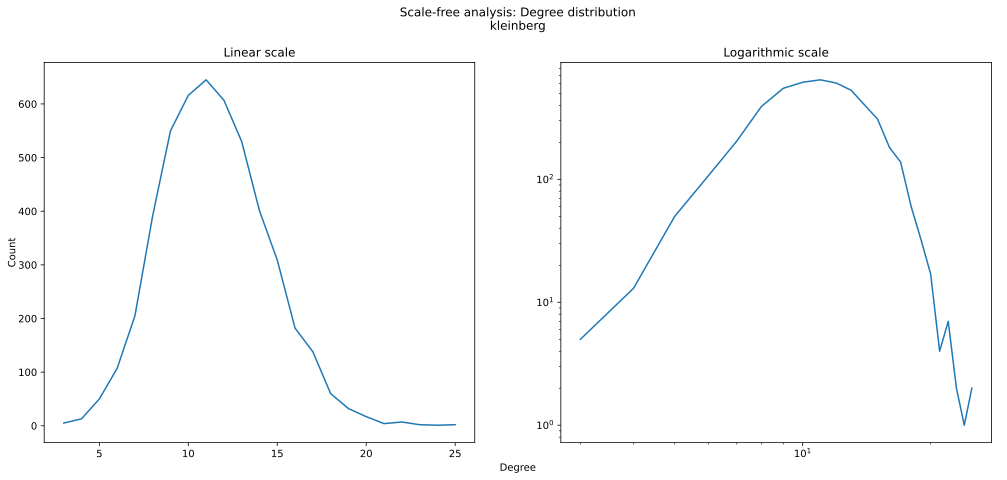

kleinberg: scale free ((False, 1.3230822233109039))


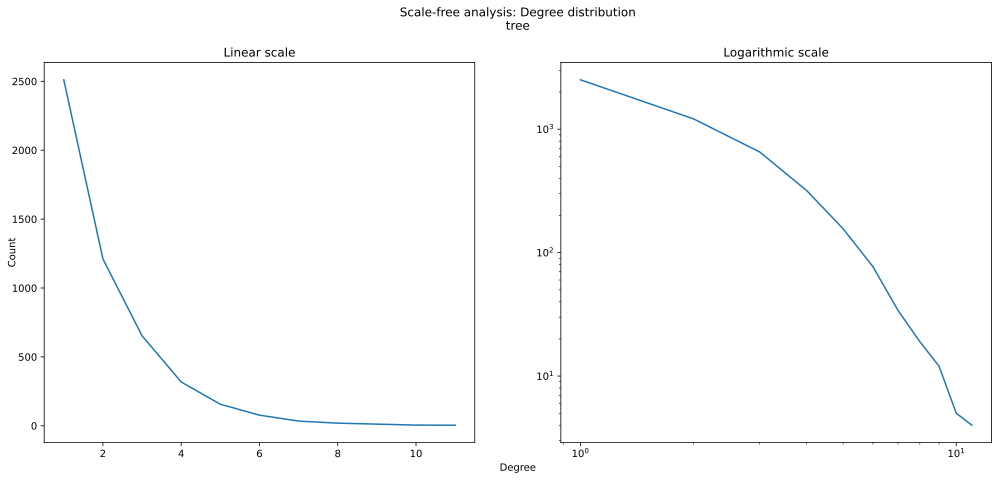

tree: scale free ((False, 1.832562949084202))


Values less than or equal to 0 in data. Throwing out 0 or negative values


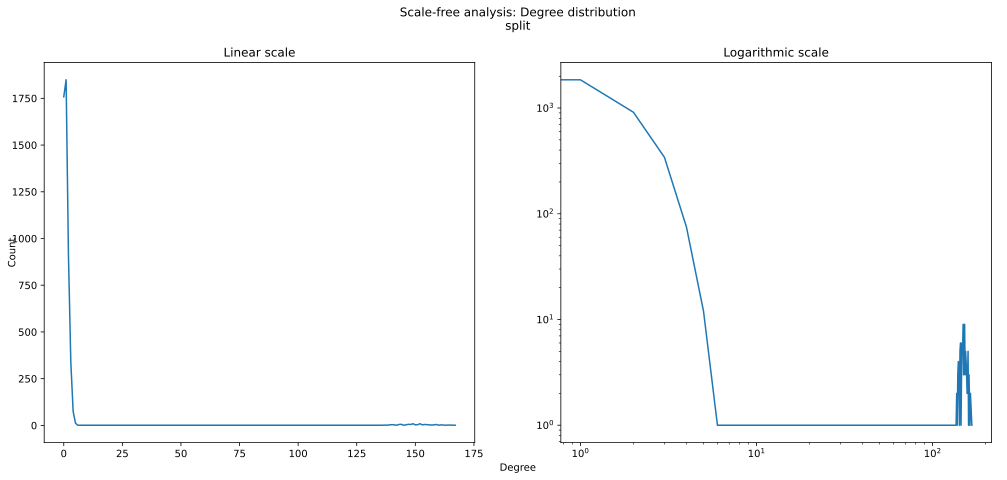

split: scale free ((False, 1.840330826072805))


In [7]:
from analysis import scale_free_classification


res = scale_free_classification(real_graphs['fb_graph'], 'Facebook Graph')
print(f'Facebook Graph: scale free ({res})')
res = scale_free_classification(real_graphs['collaboration_network'], 'Collaboration Network')
print(f'Collaboration Network: scale free ({res})')

for name, graph in synthetic_graphs.items():
    res = scale_free_classification(graph=graph, name=name)
    print(f'{name}: scale free ({res})')

### Diameter classification
Compute the diameter of each graph studied, and classify those graphs according to the ratiodiameter/log(n) (<= 1, 1 < . <= 10, > 10).

In [33]:
from analysis import diameter_classification
from prettytable import PrettyTable


results = PrettyTable(['Graph', 'd(G) / log(N) < 1', '1 < d(G) / log(N) <= 10', 'd(G) / log(N) > 10']) 

for name, graph in list(real_graphs.items()) + list(synthetic_graphs.items()):
    diameter_type = diameter_classification(graph=graph)
    row = [name, '', '', '']
    row[diameter_type + 1] = '✔'
    results.add_row(row)

print(results)

+-----------------------+-------------------+-------------------------+--------------------+
|         Graph         | d(G) / log(N) < 1 | 1 < d(G) / log(N) <= 10 | d(G) / log(N) > 10 |
+-----------------------+-------------------+-------------------------+--------------------+
|        fb_graph       |         ✔         |                         |                    |
| collaboration_network |                   |                         |         ✔          |
|         random        |                   |                         |         ✔          |
|          grid         |                   |                         |         ✔          |
|       kleinberg       |         ✔         |                         |                    |
|          tree         |                   |            ✔            |                    |
|         split         |                   |                         |         ✔          |
+-----------------------+-------------------+-------------------------

### Girth classification
Compute the girth of each graph studied, and classify those graphs according to thevalue obtained ( <= 4 vs. > 4).

In [35]:
from analysis import girth_classification


results = PrettyTable(['Graph', 'g(G) <= 4', 'g(G)  > 4']) 

for name, graph in list(real_graphs.items()) + list(synthetic_graphs.items()):
    girth_type = girth_classification(graph=graph)
    row = [name, '', '']
    row[girth_type + 1] = '✔'
    results.add_row(row)

print(results)

+-----------------------+-----------+-----------+
|         Graph         | g(G) <= 4 | g(G)  > 4 |
+-----------------------+-----------+-----------+
|        fb_graph       |     ✔     |           |
| collaboration_network |     ✔     |           |
|         random        |     ✔     |           |
|          grid         |     ✔     |           |
|       kleinberg       |     ✔     |           |
|          tree         |           |     ✔     |
|         split         |     ✔     |           |
+-----------------------+-----------+-----------+
